In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading Dataset
df = pd.read_excel('365_DataScience_Model.xlsx')

In [3]:
df.head()

,student_id,minutes_watched,engaged_quiz,engaged_exam,no_of_day_engaged,engaged_question,subscribed
0,258798,0.3,0,0,1,0,0
1,258799,0.0,0,0,0,0,0
2,258800,12.9,1,0,29,0,1
3,258801,0.0,0,0,0,0,0
4,258802,0.0,0,0,0,0,0


In [4]:
# Dropping Student id
df.drop(['student_id'],axis=1,inplace=True)

In [5]:
df.head()

,minutes_watched,engaged_quiz,engaged_exam,no_of_day_engaged,engaged_question,subscribed
0,0.3,0,0,1,0,0
1,0.0,0,0,0,0,0
2,12.9,1,0,29,0,1
3,0.0,0,0,0,0,0
4,0.0,0,0,0,0,0


In [6]:
df.shape

(35230, 6)

In [7]:
df.isnull().sum()

minutes_watched      0
engaged_quiz         0
engaged_exam         0
no_of_day_engaged    0
engaged_question     0
subscribed           0
dtype: int64

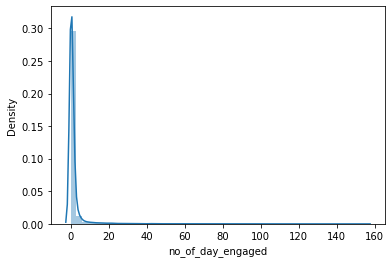

In [8]:
sns.distplot(df['no_of_day_engaged'])
plt.show()

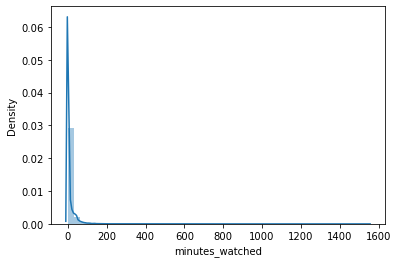

In [9]:
sns.distplot(df['minutes_watched'])
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,f1_score,recall_score

In [11]:
x_train,x_test,y_train,y_test = train_test_split(df.drop(['subscribed'],axis=1),df['subscribed'],test_size=0.2)

In [12]:
trf1 = ColumnTransformer([
    ('trf1',StandardScaler(),[0,3])
],remainder='passthrough')

In [13]:
trf2 = LogisticRegression()

In [14]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2)
])

In [15]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf1', StandardScaler(),
                                                  [0, 3])])),
                ('trf2', LogisticRegression())])

In [16]:
y_pred = pipe.predict(x_test)

In [17]:
pipe.score(x_test,y_test)

0.9694862333238717

<AxesSubplot:>

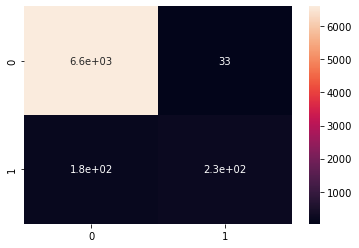

In [18]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [19]:
confusion_matrix(y_test,y_pred)

array([[6597,   33],
       [ 182,  234]], dtype=int64)

In [20]:
df.sample(6)

,minutes_watched,engaged_quiz,engaged_exam,no_of_day_engaged,engaged_question,subscribed
30021,0.3,0,0,1,0,0
33317,15.0,0,0,1,0,0
29396,0.0,0,0,0,0,0
2493,8.1,1,0,1,0,0
14152,13.2,0,0,1,0,0
29628,6.9,1,0,1,0,0


In [21]:
print('Accuracy Score : ',accuracy_score(y_test,y_pred))
print('Precision      : ',precision_score(y_test,y_pred))
print('Recall         : ',recall_score(y_test,y_pred))
print("F1 Score       : ",f1_score(y_test,y_pred))

Accuracy Score :  0.9694862333238717
Precision      :  0.8764044943820225
Recall         :  0.5625
F1 Score       :  0.6852122986822841


In [22]:
# Dumping Model
import pickle
pickle.dump(pipe,open("365_subscribtion_model.pkl",'wb'))

In [25]:
pipe.predict([[40,0,1,7,0]])

array([0], dtype=int64)